In [1]:
import torch

from optim_utils import *

import argparse

import matplotlib.pyplot as plt


In [2]:
# 1. NORMAL IFFT(FFT) OF SOME NOISE

# Example: Creating a sample real image tensor
real_image = torch.randn(1, 4, 64, 64)

# Perform 2D FFT to get the frequency domain representation
fft_image = torch.fft.fftshift(torch.fft.fft2(real_image))

# Perform the inverse FFT
ifft_image = torch.fft.ifft2(torch.fft.ifftshift(fft_image))

# Extract the real part of the inverse FFT result
reconstructed_image = ifft_image.real

# Print to verify that imaginary part is negligible
max_imaginary_part = ifft_image.imag.abs().max().item()
print("Max imaginary part:", max_imaginary_part)

# Verify the maximum difference between original and reconstructed image
max_difference = (real_image - reconstructed_image).abs().max().item()
print("Max difference between original and reconstructed image:", max_difference)

Max imaginary part: 3.132736310362816e-07
Max difference between original and reconstructed image: 8.344650268554688e-07


real_image.dtype: torch.float32
watermarking_mask.dtype: torch.bool
gt_patch.dtype: torch.complex64


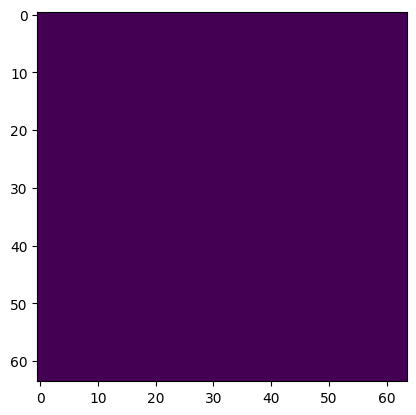

Max imaginary part: 0.4168053865432739
Max difference between original and reconstructed image: 5.371874809265137


In [15]:
# 2. IFFT(FFT) OF SOME WATERMARKED NOISE

# Example: Creating a sample real image tensor
real_image = torch.randn(1, 4, 64, 64)

# Perform 2D FFT to get the frequency domain representation
#fft_image = torch.fft.fftshift(torch.fft.fft2(real_image))

# INJECT WATERMARK HERE
# setup
parser = argparse.ArgumentParser(description='fft_test')
parser.add_argument('--w_seed', default=999999, type=int)
parser.add_argument('--w_pattern', default='zeros')
parser.add_argument('--w_mask_shape', default='circle')
parser.add_argument('--w_radius', default=25, type=int)  # 10
parser.add_argument('--w_channel', default=3, type=int)
parser.add_argument('--w_injection', default='complex')  # seed
args, unknown = parser.parse_known_args()

#device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'

# get watermarking mask
watermarking_mask = get_watermarking_mask(real_image, args, device)
gt_patch = get_watermarking_pattern(None, args, device, shape=real_image.shape)

print(f'real_image.dtype: {real_image.dtype}')
print(f'watermarking_mask.dtype: {watermarking_mask.dtype}')
print(f'gt_patch.dtype: {gt_patch.dtype}')

plt.imshow(gt_patch[0][3].real)
plt.show()

# inject watermark
wm_image, fft_image = inject_watermark(real_image, watermarking_mask, gt_patch, args,
                                       # and-mill -------------------------------------------
                                       return_fft=True
                                       # and-mill -------------------------------------------
                                       )

# Perform the inverse FFT
ifft_image = torch.fft.ifft2(torch.fft.ifftshift(fft_image))

# Extract the real part of the inverse FFT result
reconstructed_image = ifft_image.real

# Print to verify that imaginary part is negligible
max_imaginary_part = ifft_image.imag.abs().max().item()
print("Max imaginary part:", max_imaginary_part)

# Verify the maximum difference between original and reconstructed image
max_difference = (real_image - reconstructed_image).abs().max().item()
print("Max difference between original and reconstructed image:", max_difference)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-150.6833..213.90605].


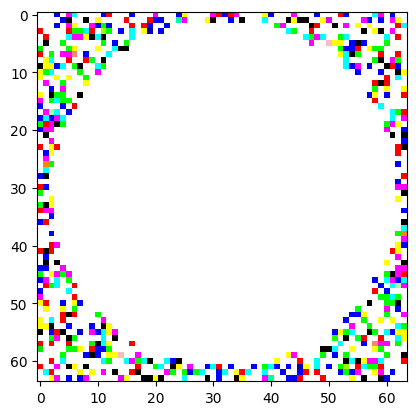

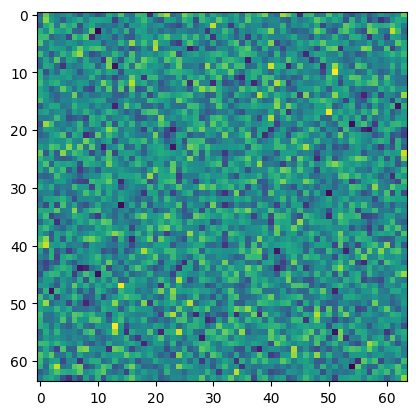

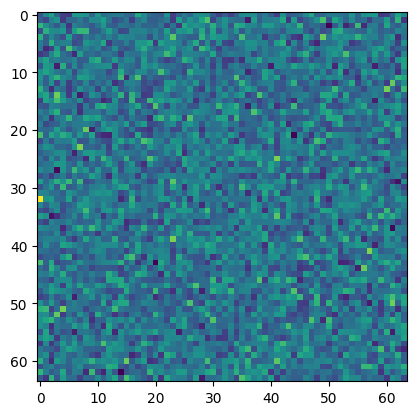

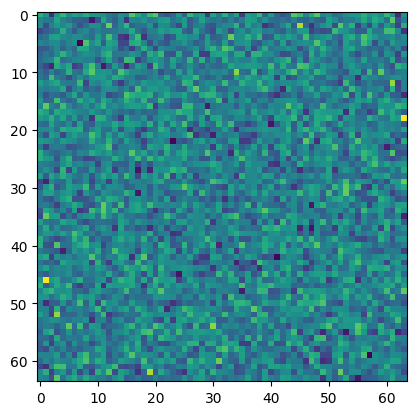

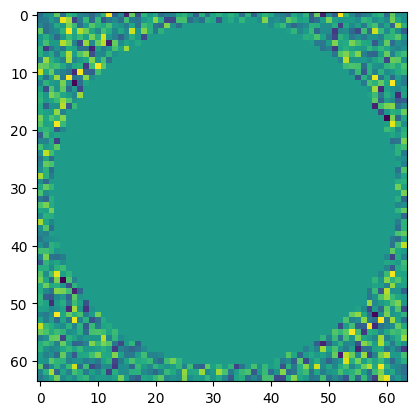

In [11]:
plt.imshow(fft_image.real[0].permute((1, 2, 0)).detach().cpu().numpy())
plt.show()
plt.imshow(fft_image.real[0][0].detach().cpu().numpy())
plt.show()
plt.imshow(fft_image.real[0][1].detach().cpu().numpy())
plt.show()
plt.imshow(fft_image.real[0][2].detach().cpu().numpy())
plt.show()
plt.imshow(fft_image.real[0][3].detach().cpu().numpy())
plt.show()